# ***QUESTION 1 (Sequential Feature Selection)***

---



---



In [ ]:
!pip install mlxtend
!pip install mlxtend --upgrade --no-deps
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

### ***1. Preprocess, clean and prepare the dataset based on the previous lab experience. Separate features and labels as X and Y respectively.***

In [4]:
import pandas as pd
import numpy as np

data_airline = pd.read_csv('/content/drive/MyDrive/PRML/Lab 8/train.csv')

In [5]:
data_airline

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [6]:
data_airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [7]:
data_airline.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [8]:
# Replacing NaN in 'Embarked' with mode
delay_mean= (data_airline['Arrival Delay in Minutes'].mean())
print("Mean of Arrival Delay in Minutes is:", delay_mean)
data_airline['Arrival Delay in Minutes'] = data_airline['Arrival Delay in Minutes'].fillna(delay_mean)

Mean of Arrival Delay in Minutes is: 15.178678301832152


In [9]:
data_airline = data_airline.drop(['Unnamed: 0', 'id'], axis=1)

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [11]:
data_airline['Gender'] = le.fit_transform(data_airline['Gender'])
data_airline['Customer Type'] = le.fit_transform(data_airline['Customer Type'])
data_airline['Type of Travel'] = le.fit_transform(data_airline['Type of Travel'])
data_airline['Class'] = le.fit_transform(data_airline['Class'])
data_airline['satisfaction'] = le.fit_transform(data_airline['satisfaction'])

In [12]:
data_airline

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [13]:
dataair_y = data_airline['satisfaction']
dataair_x = data_airline.drop(['satisfaction'], axis=1)

### ***2. Create an object of SFS by embedding the Decision Tree classifier object, providing 10 features, forward as True, floating as False and scoring = accuracy. Train SFS and report accuracy for all 10 features. Also, list the names of the 10 best features selected by SFS.***

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC

clf = DTC()
sfs = SFS(estimator=clf, k_features=10, forward=True, floating=False, scoring='accuracy')

selected_features = sfs.fit_transform(dataair_x, dataair_y)

In [ ]:
sfs.k_feature_names_

('Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Gate location',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'Baggage handling',
 'Inflight service')

In [ ]:
sfs.get_metric_dict()

{1: {'feature_idx': (11,),
  'cv_scores': array([0.78927867, 0.79308022, 0.79038545, 0.79240653, 0.78676612]),
  'avg_score': 0.7903833960456308,
  'feature_names': ('Online boarding',),
  'ci_bound': 0.0029123116786144076,
  'std_dev': 0.0022658774267616394,
  'std_err': 0.0011329387133808197},
 2: {'feature_idx': (3, 11),
  'cv_scores': array([0.84798614, 0.85217266, 0.84798614, 0.85169145, 0.84860443]),
  'avg_score': 0.8496881632686332,
  'feature_names': ('Type of Travel', 'Online boarding'),
  'ci_bound': 0.0023806771653043166,
  'std_dev': 0.0018522477140346459,
  'std_err': 0.0009261238570173229},
 3: {'feature_idx': (3, 6, 11),
  'cv_scores': array([0.89196863, 0.89307541, 0.8893701 , 0.89293104, 0.88897979]),
  'avg_score': 0.8912649918655335,
  'feature_names': ('Type of Travel',
   'Inflight wifi service',
   'Online boarding'),
  'ci_bound': 0.002252833210911684,
  'std_dev': 0.001752780774237862,
  'std_err': 0.000876390387118931},
 4: {'feature_idx': (3, 6, 9, 11),
  'cv

In [ ]:
selected_features

array([[0., 1., 2., ..., 5., 4., 5.],
       [1., 0., 0., ..., 1., 3., 4.],
       [0., 0., 0., ..., 5., 4., 4.],
       ...,
       [1., 0., 0., ..., 4., 4., 5.],
       [1., 0., 1., ..., 1., 1., 4.],
       [0., 0., 0., ..., 1., 4., 3.]])

### ***3. Using the forward and Floating parameter toggle between SFS(forward True, floating False), SBS (forward False, floating False), SFFS (forward True, floating True), SBFS (forward False, floating True), and choose cross validation = 4 for each configuration. Also, report cv scores for each configuration.***

In [ ]:
sfs = SFS(estimator=clf, k_features=10, forward=True, floating=False, scoring='accuracy', cv=4)
sbs = SFS(estimator=clf, k_features=10, forward=False, floating=False, scoring='accuracy', cv=4)
sffs = SFS(estimator=clf, k_features=10, forward=True, floating=True, scoring='accuracy', cv=4)
sbfs = SFS(estimator=clf, k_features=10, forward=False, floating=True, scoring='accuracy', cv=4)


In [ ]:
sfs.fit_transform(dataair_x, dataair_y)

array([[0., 1., 2., ..., 5., 4., 5.],
       [1., 0., 0., ..., 1., 3., 4.],
       [0., 0., 0., ..., 5., 4., 4.],
       ...,
       [1., 0., 0., ..., 4., 4., 5.],
       [1., 0., 1., ..., 1., 1., 4.],
       [0., 0., 0., ..., 1., 4., 3.]])

In [ ]:
sbs.fit_transform(dataair_x, dataair_y)

array([[0., 1., 2., ..., 4., 4., 5.],
       [1., 0., 0., ..., 1., 3., 4.],
       [0., 0., 0., ..., 4., 4., 4.],
       ...,
       [1., 0., 0., ..., 3., 4., 5.],
       [1., 0., 1., ..., 4., 1., 4.],
       [0., 0., 0., ..., 1., 4., 3.]])

In [ ]:
sffs.fit_transform(dataair_x, dataair_y)

array([[0., 1., 2., ..., 4., 5., 5.],
       [1., 0., 0., ..., 3., 4., 1.],
       [0., 0., 0., ..., 4., 4., 5.],
       ...,
       [1., 0., 0., ..., 4., 5., 4.],
       [1., 0., 1., ..., 1., 4., 1.],
       [0., 0., 0., ..., 4., 3., 1.]])

In [ ]:
sbfs.fit_transform(dataair_x, dataair_y)

array([[0., 1., 2., ..., 4., 5., 5.],
       [1., 0., 0., ..., 3., 4., 1.],
       [0., 0., 0., ..., 4., 4., 5.],
       ...,
       [1., 0., 0., ..., 4., 5., 4.],
       [1., 0., 1., ..., 1., 4., 1.],
       [0., 0., 0., ..., 4., 3., 1.]])

In [ ]:
sfs_dic = sfs.get_metric_dict()
sbs_dic = sbs.get_metric_dict()
sffs_dic = sffs.get_metric_dict()
sbfs_dic = sbfs.get_metric_dict()

### ***4. Visualize the output from the feature selection in a pandas DataFrame format using the get_metric_dict for all four configurations. Finally, plot the results for each configuration (from mlxtend. plotting import plot_sequential_feature_selection as plot_sfs).***

In [ ]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

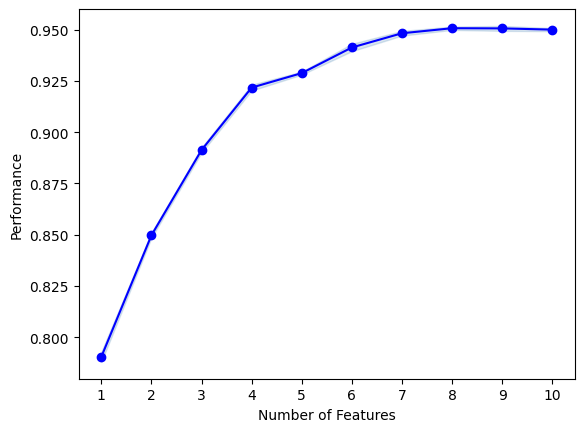

In [ ]:
plot_sfs(sfs_dic)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

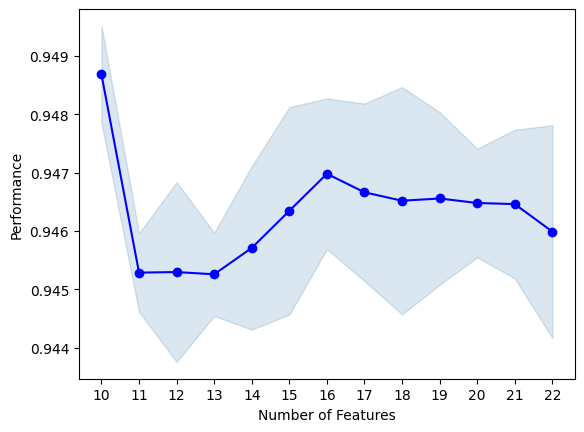

In [ ]:
plot_sfs(sbs_dic)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

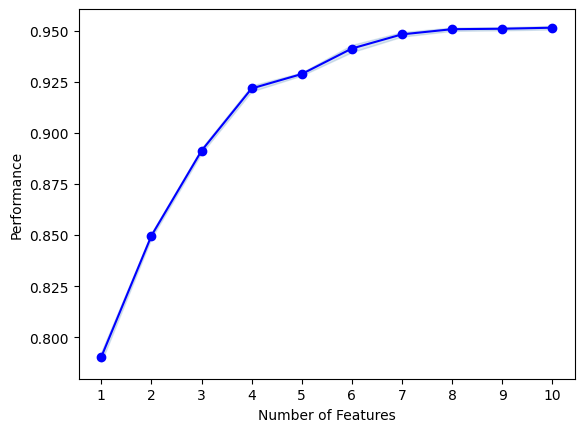

In [ ]:
plot_sfs(sffs_dic)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

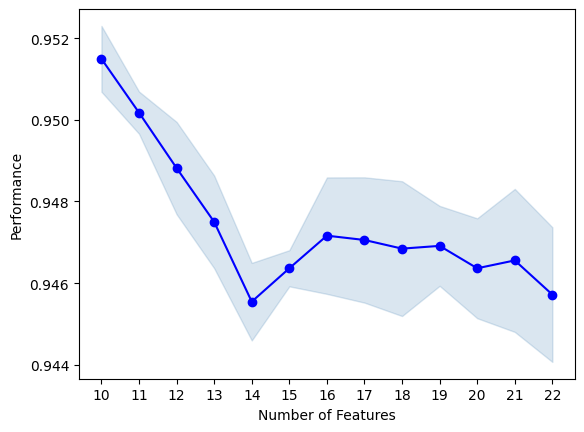

In [ ]:
plot_sfs(sbfs_dic)

### ***5) Implement Bi-directional Feature Set Generation Algorithm from scratch. It must take a Full Set of features as well as similarity measures as input.***

In [27]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC

In [28]:
class Bidirectional_FS():

    def __init__(self, df, labels, threshold=0, criterion='euclidean'):
        self.criterion = criterion
        self.df = df.T
        self.threshold = threshold
        self.labels = labels

        similarity_dict = {
            'accuracy_dtc': self.criterion_accuracy_dtc, 
            'accuracy_svm': self.criterion_accuracy_svm, 
            'euclidean': self.criterion_euclidean, 
            'city_block': self.criterion_city_block, 
            'angular': self.criterion_angular, 
            'info_gain': self.criterion_info_gain, 
        }

        self.similarity_measure = similarity_dict[self.criterion]

    def criterion_accuracy_dtc(self, X):
        clf = DTC(max_depth = 8)
        clf.fit(X.T, self.labels)
        return clf.score(X.T, self.labels)

    def criterion_accuracy_svm(self, X):
        clf = SVC()
        clf.fit(X.T, self.labels)
        return clf.score(X.T, self.labels)
        return

    def criterion_euclidean(self, X):
        dist_matrix = np.sqrt(((X[:, np.newaxis] - X)**2).sum(axis=2))
        similarity_matrix = 1 / (1 + dist_matrix)
        return np.sum(similarity_matrix)

    def criterion_city_block(self, X):
        dist_matrix = np.abs(X[:, np.newaxis] - X).sum(axis=2)
        similarity_matrix = 1 / (1 + dist_matrix)
        return np.sum(similarity_matrix)

    def criterion_angular(self, X):
        norms = np.sqrt(np.sum(X ** 2, axis=1))
        ftrs = X / norms[:, np.newaxis]
        similarity_matrix = ftrs @ ftrs.T
        return np.sum(similarity_matrix)

    def criterion_info_gain(self, X):
        info_gain_scores = mutual_info_classif(X.T, self.labels)
        info_gain_matrix = np.outer(info_gain_scores, info_gain_scores)
        return np.sum(info_gain_matrix)


    def ffs(self, Sf, best_score):
        best_feature = []

        for feature in self.df.tolist():
            if feature not in Sf:
                Sf.append(feature)
                current_score = self.similarity_measure(np.array(Sf))

                if current_score > best_score:
                    best_score = current_score
                    best_feature = feature

                Sf.remove(feature)
        Sf.append(best_feature)

        return Sf, best_score

    def bfs(self, Sb, best_score):
        worst_feature = -1
        temp = [i for i in self.df.tolist() if i not in Sb]

        for feature in range(len(temp)):

            curr = temp[feature]
            temp.remove(curr)
            current_score = self.similarity_measure(np.array(temp))

            if current_score > best_score:
                best_score = current_score
                worst_feature = feature
            temp.insert(feature, curr)

        if worst_feature == -1:
            return Sb, best_score

        curr = temp[worst_feature]

        Sb.append(curr)

        return Sb, best_score

    def bdfs(self):
        Sf = []
        Sb = []
        best_ffs_score = 0
        best_bfs_score = 0
        count = 0
        while(True):
            count += 1
            score1 = best_ffs_score
            score2 = best_bfs_score
            
            Sf, best_ffs_score = self.ffs(Sf, best_ffs_score)
            Sb, best_bfs_score = self.bfs(Sb, best_bfs_score)
            print(f'Iteration {count} ----- ')
            print(f'best_ffs_score = {best_ffs_score}')
            print(f'best_bfs_score = {best_bfs_score}')
            print()

            temp = [i for i in self.df.tolist() if i not in Sb]
            
            if self.threshold != 0:

                if best_bfs_score > self.threshold:
                    return temp

                elif best_ffs_score > self.threshold:
                    return Sf

            if (score1 == best_ffs_score) or (score2 == best_bfs_score):
                if score1 > score2:
                    return Sf
                else:
                    return temp

            elif (len(self.df) == len(Sf)) or len(temp)==0:
                return Sf



### ***6) Use the function implemented in part 5 and use selection criteria from the following:***

***Accuracy Measures: using Decision Tree and SVM Classifiers***

***Information Measures: Information gain***

***Distance Measure: Angular Separation, Euclidian Distance and City-Block Distance***

***Distance Measures. - Measures of separability, discrimination or divergence measures. The most typical is derived from the distance between the class conditional density functions.)***

In [30]:
model = Bidirectional_FS(dataair_x.to_numpy(), dataair_y.to_numpy(), threshold=300, criterion='city_block')
ctblk_x = model.bdfs()

Iteration 1 ----- 
best_ffs_score = 1.0
best_bfs_score = 21.00221227404844

Iteration 2 ----- 
best_ffs_score = 2.0000389658464357
best_bfs_score = 21.00221227404844



In [32]:
model = Bidirectional_FS(dataair_x.to_numpy(), dataair_y.to_numpy(), threshold=300, criterion='euclidean')
euclid_x = model.bdfs()

Iteration 1 ----- 
best_ffs_score = 1.0
best_bfs_score = 21.5121365400959

Iteration 2 ----- 
best_ffs_score = 2.008789183524195
best_bfs_score = 21.5121365400959



In [33]:
model = Bidirectional_FS(dataair_x.to_numpy(), dataair_y.to_numpy(), threshold=300, criterion='angular')
ang_x = model.bdfs()

Iteration 1 ----- 
best_ffs_score = 1.000000000000028
best_bfs_score = 311.6705626338067



In [ ]:
model = Bidirectional_FS(dataair_x.to_numpy(), dataair_y.to_numpy(), threshold=0.4, criterion='info_gain')
infog_x = model.bdfs()

In [ ]:
model = Bidirectional_FS(dataair_x.to_numpy(), dataair_y.to_numpy(), threshold=0.8, criterion='accuracy_svm')
svm_x = model.bdfs()

In [ ]:
model = Bidirectional_FS(dataair_x.to_numpy(), dataair_y.to_numpy(), threshold=0.9, criterion='accuracy_dtc')
dtc_x = model.bdfs()

### ***7) Train any classifier of your choice on the Selected features generated from each measure and report its classification results.***

In [38]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [39]:
clf = DTC(max_depth=5)
clf.fit(np.array(ctblk_x).T, dataair_y)
clf.score(np.array(ctblk_x).T, dataair_y)

0.9051913304588851

In [40]:
clf = DTC(max_depth=5)
clf.fit(np.array(euclid_x).T, dataair_y)
clf.score(np.array(euclid_x).T, dataair_y)

0.9051913304588851

In [42]:
clf = DTC(max_depth=5)
clf.fit(np.array(ang_x).T, dataair_y)
clf.score(np.array(ang_x).T, dataair_y)

0.9036225746843239

# ***QUESTION 2***

---



---



### ***1. Make a Dataset of 1000 points sampled from a zero-centred gaussian distribution with a covariance matrix.***

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
covar_mat = np.matrix('0.6006771 0.14889879 0.244939; 0.14889879 0.58982531 0.241548981; 0.244939 0.24154981 0.48778655')
mean = [0, 0, 0]

In [ ]:
data_2 = np.random.multivariate_normal(mean, covar_mat, size=1000)

<ipython-input-51-18f3411648fe>:1: RuntimeWarning: covariance is not positive-semidefinite.
  data_2 = np.random.multivariate_normal(mean, covar_mat, size=1000)


In [ ]:
labels = np.zeros(1000)
v = np.array([1, 1, -2]) / np.sqrt(6)

for i in range(1000):
    if np.dot(data_2[i], v) > 0:
        labels[i] = 0
    else:
        labels[i] = 1

In [ ]:
data_df_2 = pd.DataFrame(data_2)
data_df_2[3] = labels
data_df_2.columns = ['x', 'y', 'z', 'labels']

In [ ]:
import plotly.express as px

fig = px.scatter_3d(data_df_2, x='x', y='y', z='z',
              color='labels')
fig.show()

### ***2. Apply Principal Component analysis (using sklearn) with n_components=3 on the input data X and transform the data accordingly.***

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data2_pca = pca.fit_transform(data_2)

In [ ]:
data2_pca

array([[-0.70494987,  0.81400013, -0.23675189],
       [ 0.25078076, -0.26443209, -0.90241753],
       [-1.47878573,  0.37284398,  0.58725716],
       ...,
       [ 0.76474627, -0.33146532,  0.13490491],
       [ 1.78919443,  0.99455557, -0.36263937],
       [ 2.35829429,  0.75919048,  0.18670425]])

In [ ]:
data2_df_pca = pd.DataFrame(data2_pca)
data2_df_pca[3] = labels
data2_df_pca.columns = ['x', 'y', 'z', 'labels']

### ***3. Perform Complete FS on the Transformed Data with a number of features in subset =2. Fit a Decision Tree for every subset-set of features of size 2 and plot their decision boundaries superimposed with the data.***

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTC
import sklearn.feature_selection

In [ ]:
features = np.array([['x', 'z'],
                     ['y', 'z'],
                     ['x', 'y']])



For feature axis  ['x' 'z'] , accuracy on train data is:  1.0 ...............and on test data is:  0.99 




For feature axis  ['y' 'z'] , accuracy on train data is:  1.0 ...............and on test data is:  0.965 




<ipython-input-60-f1586810baa8>:43: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

<ipython-input-60-f1586810baa8>:43: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored





For feature axis  ['x' 'y'] , accuracy on train data is:  1.0 ...............and on test data is:  0.535 




<ipython-input-60-f1586810baa8>:43: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



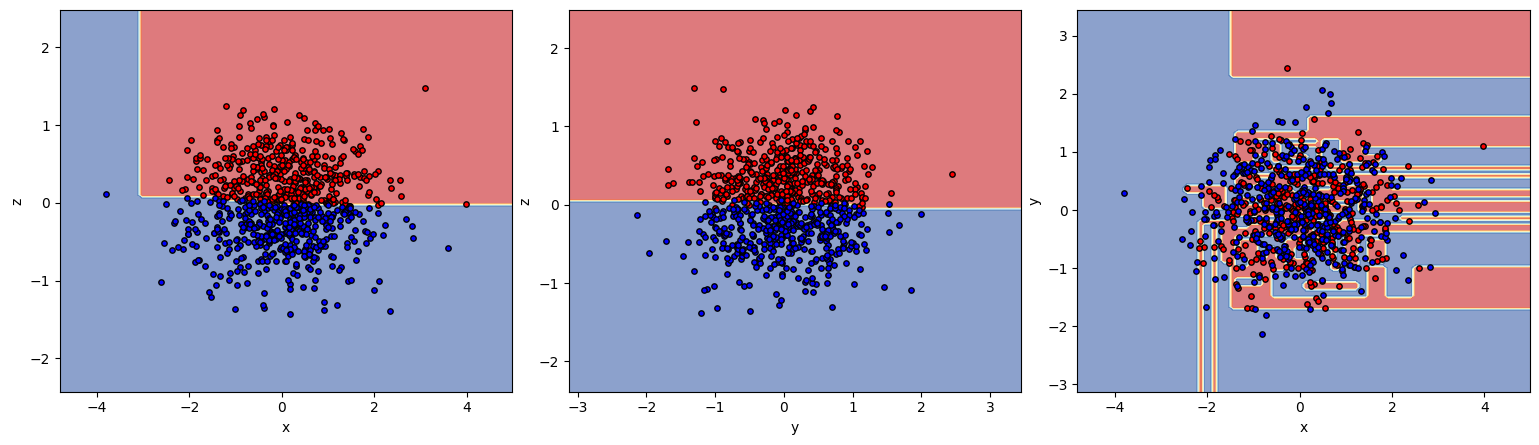

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split as split

plt.figure(figsize=(16, 5))

for i in range(3):

    feature = features[i]
    classes = [0, 1]

    x = pd.DataFrame.to_numpy(data2_df_pca[feature])

    x_train, x_test, y_train, y_test = split(x, labels, train_size = 0.8)

    dtc = DTC()
    dtc.fit(x_train, y_train)

    print("\n\nFor feature axis ", feature, ', accuracy on train data is: ', dtc.score(x_train, y_train), '...............and on test data is: ', dtc.score(x_test, y_test), '\n\n')

    # Parameters
    n_classes = 2
    plot_colors = "rb"
    plot_step = 0.02

    ax = plt.subplot(1, 3, i+1)

    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(
        dtc,
        x_train,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=feature[0],
        ylabel=feature[1],
        alpha = 0.6
        )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_train == classes[i])
        plt.scatter(
            x_train[idx, 0],
            x_train[idx, 1],
            c=color,
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.show()

### ***4. Which of the above feature subsets represents the one that can be obtained by applying PCA(n_components =2)? Explain the difference in the accuracies between this subset and other subsets by running suitable experiments.***

In [ ]:
pca = PCA(n_components=2)
data2_pca_4 = pca.fit_transform(data_2)

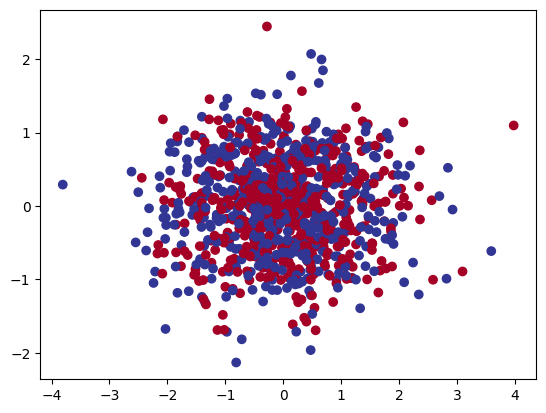

In [ ]:
plt.scatter(data2_pca_4[:, 0], data2_pca_4[:, 1], c=labels, cmap='RdYlBu')
plt.show()

**The data formed with n_components=2 can represent the subset which had 'x' and 'y' axis of the data as its features from the previous data with n_components=3.**

<ipython-input-63-e947507d9477>:31: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



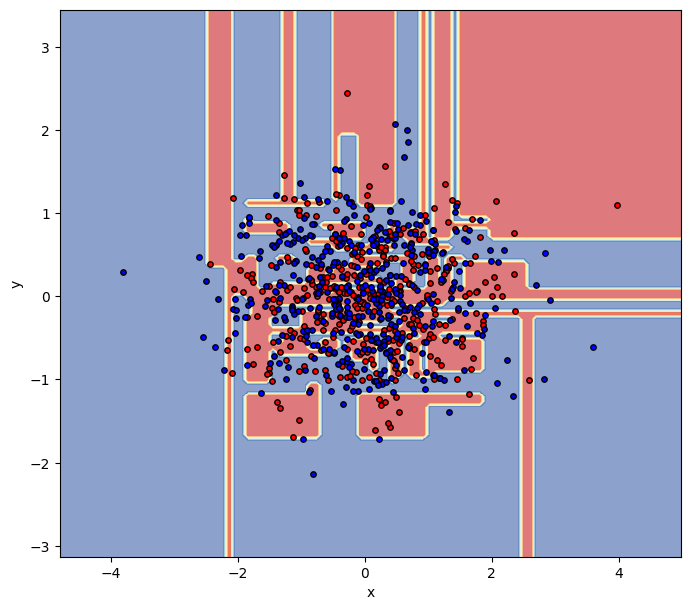

In [ ]:
x = data2_pca_4
x_train2, x_test2, y_train2, y_test2 = split(x, labels, train_size = 0.8)

dtc2 = DTC()
dtc2.fit(x_train2, y_train2)

plt.figure(figsize=(20, 12))

# Parameters
n_classes = 2
plot_colors = "rb"
plot_step = 0.02

ax = plt.subplot(2, 3, 1)

plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
DecisionBoundaryDisplay.from_estimator(
    dtc2,
    x_train2,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    xlabel='x',
    ylabel='y',
    alpha = 0.6
    )

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y_train2 == classes[i])
    plt.scatter(
        x_train2[idx, 0],
        x_train2[idx, 1],
        c=color,
        cmap=plt.cm.RdYlBu,
        edgecolor="black",
        s=15,
    )

plt.show()


In [ ]:
print('Accuracy on train data is: ', dtc2.score(x_train2, y_train2), '   and on test data is: ', dtc2.score(x_test2, y_test2))

Accuracy on train data is:  1.0    and on test data is:  0.5
